In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Spam Detection Project Started")


Spam Detection Project Started


In [5]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']




In [6]:

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

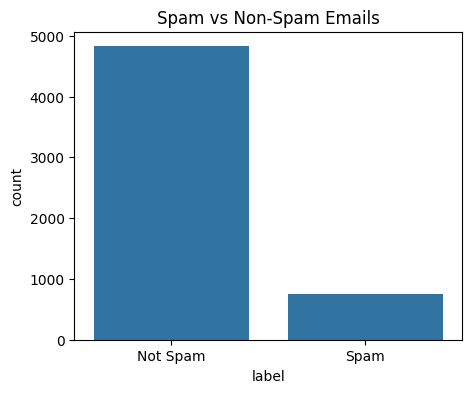

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['label'])
plt.xticks([0,1], ['Not Spam', 'Spam'])
plt.title("Spam vs Non-Spam Emails")
plt.show()


In [10]:
X = df['message']  # input (email text)
y = df['label']    # output (spam/not spam)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
vectorizer = TfidfVectorizer(stop_words='english')

# Fit on training data and transform both train & test sets
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [12]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [13]:
y_pred = model.predict(X_test_vec)


Accuracy: 0.9668161434977578


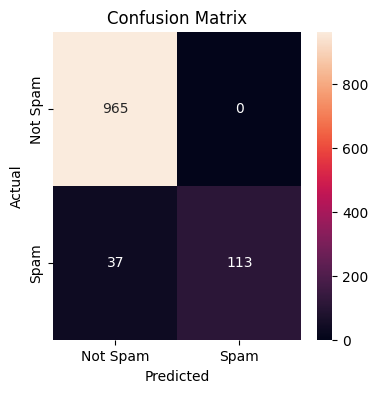


Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [14]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Not Spam','Spam'],
            yticklabels=['Not Spam','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [15]:
test_email = ["Congratulations! You won a free lottery. Click now"]
test_vec = vectorizer.transform(test_email)
result = model.predict(test_vec)

print("Email Type:", "Spam" if result[0] == 1 else "Not Spam")


Email Type: Spam


In [16]:
print("Project Finished")


Project Finished
